In [1]:
import pandas as pd
import re
import math
import numpy as np
import scipy
import os
import time
import seaborn as sns
from scipy.stats import binom, hypergeom
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [2]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

In [3]:
df = pd.read_csv('cab_rides.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
distance            693071 non-null float64
cab_type            693071 non-null object
time_stamp          693071 non-null int64
destination         693071 non-null object
source              693071 non-null object
price               637976 non-null float64
surge_multiplier    693071 non-null float64
id                  693071 non-null object
product_id          693071 non-null object
name                693071 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [5]:
df.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.189430,1.544046e+12,16.545125,1.013870
std,1.138937,6.891925e+08,9.324359,0.091641
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


In [7]:
df['day']=df.time_stamp.apply(lambda x: time.strftime('%a', time.localtime(x/1000)))


In [8]:
df['AMPM']=df.time_stamp.apply(lambda x: time.strftime('%p', time.localtime(x/1000)))


In [10]:
df['month']=df.time_stamp.apply(lambda x: time.strftime('%b', time.localtime(x/1000)))


In [13]:
df['time']=df.time_stamp.apply(lambda x: time.strftime('%H', time.localtime(x/1000)))


In [14]:
df['week']=df.time_stamp.apply(lambda x: time.strftime('%U', time.localtime(x/1000)))


In [23]:
df['date_time']=df.time_stamp.apply(lambda x: time.strftime('%Y-%m-%d %H', time.localtime(x/1000)))


In [24]:
df.date_time.max()

'2018-12-18 14'

In [25]:
df.date_time.min()

'2018-11-25 22'

In [19]:
df.week.max()

'50'

In [20]:
df.week.min()

'47'

In [26]:
df['merge_date'] = df.source.astype(str) +" - "+ df.date_time.astype("str") 



In [27]:
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time,day,AMPM,month,time,week,merge_date
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 04,Sun,AM,Dec,04,50,Haymarket Square - 2018-12-16 04
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-26 21,Mon,PM,Nov,21,47,Haymarket Square - 2018-11-26 21
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-27 20,Tue,PM,Nov,20,47,Haymarket Square - 2018-11-27 20
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-29 23,Thu,PM,Nov,23,47,Haymarket Square - 2018-11-29 23
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-28 22,Wed,PM,Nov,22,47,Haymarket Square - 2018-11-28 22


In [28]:
df1 = pd.read_csv('weather.csv')

In [29]:
df1.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [32]:
df1['date_time']=df1.time_stamp.apply(lambda x: time.strftime('%Y-%m-%d %H', time.localtime(x)))


In [33]:
df1.date_time

0       2018-12-16 18
1       2018-12-16 18
2       2018-12-16 18
3       2018-12-16 18
4       2018-12-16 18
5       2018-12-16 18
6       2018-12-16 18
7       2018-12-16 18
8       2018-12-16 18
9       2018-12-16 18
10      2018-12-16 18
11      2018-11-27 14
12      2018-11-27 14
13      2018-11-27 14
14      2018-11-27 14
15      2018-11-27 14
16      2018-11-27 14
17      2018-11-27 14
18      2018-11-27 14
19      2018-11-27 14
20      2018-11-27 14
21      2018-11-27 14
22      2018-11-27 14
23      2018-11-26 19
24      2018-11-26 19
25      2018-11-28 19
26      2018-11-28 19
27      2018-11-28 19
28      2018-11-28 19
29      2018-11-28 19
            ...      
6246    2018-12-17 08
6247    2018-12-17 08
6248    2018-12-17 08
6249    2018-12-17 08
6250    2018-12-17 08
6251    2018-12-02 06
6252    2018-12-02 06
6253    2018-12-02 06
6254    2018-12-02 06
6255    2018-12-02 06
6256    2018-12-02 06
6257    2018-12-02 06
6258    2018-12-02 06
6259    2018-12-02 06
6260    20

In [36]:
#merge the datasets to refelect same time for a location
df1['merge_date'] = df1.location.astype(str) +" - "+ df1.date_time.astype("str") 


In [117]:
merged_df = df.merge(df1, how='inner', left_on = ['merge_date'], right_on=['merge_date'], suffixes=('_c','_w'))
merged_df.head()

,distance,cab_type,time_stamp_c,destination,source,price,surge_multiplier,id,product_id,name,...,merge_date,temp,location,clouds,pressure,rain,time_stamp_w,humidity,wind,date_time_w
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,Haymarket Square - 2018-12-16 04,38.46,Haymarket Square,0.29,1022.25,NaN,1544953501,0.76,7.68,2018-12-16 04
1,1.33,Lyft,1544952309308,Beacon Hill,Haymarket Square,7.0,1.0,0d468502-34b5-447f-be9f-acbb62176072,lyft,Lyft,...,Haymarket Square - 2018-12-16 04,38.46,Haymarket Square,0.29,1022.25,NaN,1544953501,0.76,7.68,2018-12-16 04
2,0.53,Lyft,1544951109578,North Station,Haymarket Square,27.5,1.0,2aa8d17e-4b13-4200-87db-db3eed73ca6b,lyft_luxsuv,Lux Black XL,...,Haymarket Square - 2018-12-16 04,38.46,Haymarket Square,0.29,1022.25,NaN,1544953501,0.76,7.68,2018-12-16 04
3,2.36,Lyft,1544954108860,Back Bay,Haymarket Square,7.0,1.0,4944c164-0463-47b9-96e1-15ffe8b9c7c9,lyft_line,Shared,...,Haymarket Square - 2018-12-16 04,38.46,Haymarket Square,0.29,1022.25,NaN,1544953501,0.76,7.68,2018-12-16 04
4,0.62,Uber,1544954108161,West End,Haymarket Square,10.5,1.0,b1c23003-39fb-4030-9961-4f3420b23907,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,...,Haymarket Square - 2018-12-16 04,38.46,Haymarket Square,0.29,1022.25,NaN,1544953501,0.76,7.68,2018-12-16 04


In [118]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1265675 entries, 0 to 1265674
Data columns (total 26 columns):
distance            1265675 non-null float64
cab_type            1265675 non-null object
time_stamp_c        1265675 non-null int64
destination         1265675 non-null object
source              1265675 non-null object
price               1164996 non-null float64
surge_multiplier    1265675 non-null float64
id                  1265675 non-null object
product_id          1265675 non-null object
name                1265675 non-null object
date_time_c         1265675 non-null object
day                 1265675 non-null object
AMPM                1265675 non-null object
month               1265675 non-null object
time                1265675 non-null object
week                1265675 non-null object
merge_date          1265675 non-null object
temp                1265675 non-null float64
location            1265675 non-null object
clouds              1265675 non-null float64
pre

In [119]:
merged_df.drop_duplicates(subset='id', keep='first', inplace=True)

In [120]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690107 entries, 0 to 1265669
Data columns (total 26 columns):
distance            690107 non-null float64
cab_type            690107 non-null object
time_stamp_c        690107 non-null int64
destination         690107 non-null object
source              690107 non-null object
price               635242 non-null float64
surge_multiplier    690107 non-null float64
id                  690107 non-null object
product_id          690107 non-null object
name                690107 non-null object
date_time_c         690107 non-null object
day                 690107 non-null object
AMPM                690107 non-null object
month               690107 non-null object
time                690107 non-null object
week                690107 non-null object
merge_date          690107 non-null object
temp                690107 non-null float64
location            690107 non-null object
clouds              690107 non-null float64
pressure            6901

In [121]:
merged_df['time'] = merged_df['time'].astype(int)


In [122]:
merged_df['rushhr'] = 0

In [123]:
merged_df.loc[(merged_df.time > 7) & (merged_df.time < 10), 'rushhr'] = 1

In [124]:
merged_df.loc[(merged_df.time > 17) & (merged_df.time < 22), 'rushhr'] = 1

In [125]:
merged_df.groupby('time')['rushhr'].sum()

time
0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8     30384
9     30384
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18    31931
19    32413
20    27768
21    28548
22        0
23        0
Name: rushhr, dtype: int64

In [126]:
merged_df = pd.get_dummies(merged_df, columns=[
                           'cab_type', 'destination', 'source', 'name', 'day', 'AMPM', 'month', 'week'])

In [127]:
merged_df.head(100)

,distance,time_stamp_c,price,surge_multiplier,id,product_id,date_time_c,time,merge_date,temp,...,day_Tue,day_Wed,AMPM_AM,AMPM_PM,month_Dec,month_Nov,week_47,week_48,week_49,week_50
0,0.44,1544952607890,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,2018-12-16 04,4,Haymarket Square - 2018-12-16 04,38.46,...,0,0,1,0,1,0,0,0,0,1
1,1.33,1544952309308,7.0,1.0,0d468502-34b5-447f-be9f-acbb62176072,lyft,2018-12-16 04,4,Haymarket Square - 2018-12-16 04,38.46,...,0,0,1,0,1,0,0,0,0,1
2,0.53,1544951109578,27.5,1.0,2aa8d17e-4b13-4200-87db-db3eed73ca6b,lyft_luxsuv,2018-12-16 04,4,Haymarket Square - 2018-12-16 04,38.46,...,0,0,1,0,1,0,0,0,0,1
3,2.36,1544954108860,7.0,1.0,4944c164-0463-47b9-96e1-15ffe8b9c7c9,lyft_line,2018-12-16 04,4,Haymarket Square - 2018-12-16 04,38.46,...,0,0,1,0,1,0,0,0,0,1
4,0.62,1544954108161,10.5,1.0,b1c23003-39fb-4030-9961-4f3420b23907,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,2018-12-16 04,4,Haymarket Square - 2018-12-16 04,38.46,...,0,0,1,0,1,0,0,0,0,1
5,0.49,1544953210139,26.0,1.0,b2c44c57-4728-441e-83ce-f796a55e6b20,6d318bcc-22a3-4af6-bddd-b409bfce1546,2018-12-16 04,4,Haymarket Square - 2018-12-16 04,38.46,...,0,0,1,0,1,0,0,0,0,1
6,0.91,1544952010722,NaN,1.0,bf959122-861a-479d-804b-fdfdc83c2011,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,2018-12-16 04,4,Haymarket Square - 2018-12-16 04,38.46,...,0,0,1,0,1,0,0,0,0,1
7,2.38,1544950807092,16.5,1.0,e20be752-be44-4093-8600-c48608b7079e,lyft_premier,2018-12-16 04,4,Haymarket Square - 2018-12-16 04,38.46,...,0,0,1,0,1,0,0,0,0,1
8,0.61,1544953511805,6.5,1.0,04f35170-0dad-4ae2-b5c9-02310e811fd8,997acbb5-e102-41e1-b155-9df7de0a73f2,2018-12-16 04,4,Haymarket Square - 2018-12-16 04,38.46,...,0,0,1,0,1,0,0,0,0,1
9,1.16,1544953810508,13.0,1.0,c797e710-b45d-4005-9ba6-c425ff306c05,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,2018-12-16 04,4,Haymarket Square - 2018-12-16 04,38.46,...,0,0,1,0,1,0,0,0,0,1


In [128]:
merged_df['Black'] = 0

In [129]:
merged_df['Black'] = merged_df['name_Black'] + merged_df['name_Black SUV'] + \
    merged_df['name_Lux Black'] + merged_df['name_Lux Black XL']

In [130]:
merged_df.groupby('Black')['name_Black','name_Black SUV','name_Lux Black','name_Lux Black XL'].sum()

,name_Black,name_Black SUV,name_Lux Black,name_Lux Black XL
Black,,,,
0,0.0,0.0,0.0,0.0
1,54852.0,54849.0,51021.0,51019.0


In [131]:
merged_df['sports'] = 0

In [132]:
merged_df.loc[(merged_df.date_time_c.str.contains('2018-12-02')) & (merged_df.AMPM_PM == 1), 'sports'] = 1
merged_df.loc[(merged_df.date_time_c.str.contains('2018-11-30')) & (merged_df.AMPM_PM == 1), 'sports'] = 1
merged_df.loc[(merged_df.date_time_c.str.contains('2018-12-06')) & (merged_df.AMPM_PM == 1), 'sports'] = 1
merged_df.loc[(merged_df.date_time_c.str.contains('2018-12-10')) & (merged_df.AMPM_PM == 1), 'sports'] = 1
merged_df.loc[(merged_df.date_time_c.str.contains('2018-12-14')) & (merged_df.AMPM_PM == 1), 'sports'] = 1
merged_df.loc[(merged_df.date_time_c.str.contains('2018-11-29')) & (merged_df.AMPM_PM == 1), 'sports'] = 1
merged_df.loc[(merged_df.date_time_c.str.contains('2018-12-01')) & (merged_df.AMPM_PM == 1), 'sports'] = 1
merged_df.loc[(merged_df.date_time_c.str.contains('2018-12-08')) & (merged_df.AMPM_PM == 1), 'sports'] = 1
merged_df.loc[(merged_df.date_time_c.str.contains('2018-12-11')) & (merged_df.AMPM_PM == 1), 'sports'] = 1
merged_df.loc[(merged_df.date_time_c.str.contains('2018-12-16')) & (merged_df.AMPM_PM == 1), 'sports'] = 1

In [137]:
sportdf = merged_df.groupby('date_time_c')['sports'].sum()
with pd.option_context("display.max_rows", 1000):
    display(sportdf)

date_time_c
2018-11-25 22       0
2018-11-25 23       0
2018-11-26 00       0
2018-11-26 01       0
2018-11-26 02       0
2018-11-26 03       0
2018-11-26 04       0
2018-11-26 05       0
2018-11-26 06       0
2018-11-26 07       0
2018-11-26 08       0
2018-11-26 09       0
2018-11-26 10       0
2018-11-26 11       0
2018-11-26 12       0
2018-11-26 13       0
2018-11-26 14       0
2018-11-26 15       0
2018-11-26 16       0
2018-11-26 17       0
2018-11-26 18       0
2018-11-26 19       0
2018-11-26 20       0
2018-11-26 21       0
2018-11-26 22       0
2018-11-26 23       0
2018-11-27 00       0
2018-11-27 01       0
2018-11-27 02       0
2018-11-27 03       0
2018-11-27 04       0
2018-11-27 05       0
2018-11-27 06       0
2018-11-27 07       0
2018-11-27 08       0
2018-11-27 09       0
2018-11-27 10       0
2018-11-27 11       0
2018-11-27 12       0
2018-11-27 13       0
2018-11-27 14       0
2018-11-27 15       0
2018-11-27 16       0
2018-11-27 17       0
2018-11-27 18       

In [139]:
np.sum(merged_df.isnull(),axis = 0)

distance                                    0
time_stamp_c                                0
price                                   54865
surge_multiplier                            0
id                                          0
product_id                                  0
date_time_c                                 0
time                                        0
merge_date                                  0
temp                                        0
location                                    0
clouds                                      0
pressure                                    0
rain                                   591351
time_stamp_w                                0
humidity                                    0
wind                                        0
date_time_w                                 0
rushhr                                      0
cab_type_Lyft                               0
cab_type_Uber                               0
destination_Back Bay              

In [140]:
merged_df.rain.fillna(0, inplace= True)

In [141]:
merged_df['rain_d']=0

In [142]:
merged_df.loc[(merged_df.rain) > 0, 'rain_d'] = 1


In [144]:
merged_df[merged_df.rain_d == 0].count()

distance                               591351
time_stamp_c                           591351
price                                  544454
surge_multiplier                       591351
id                                     591351
product_id                             591351
date_time_c                            591351
time                                   591351
merge_date                             591351
temp                                   591351
location                               591351
clouds                                 591351
pressure                               591351
rain                                   591351
time_stamp_w                           591351
humidity                               591351
wind                                   591351
date_time_w                            591351
rushhr                                 591351
cab_type_Lyft                          591351
cab_type_Uber                          591351
destination_Back Bay              

In [176]:
merged_df['wkndPM']=0

In [177]:
merged_df.loc[(merged_df.day_Fri == 1) & (merged_df.AMPM_PM == 1), 'wkndPM'] = 1
merged_df.loc[(merged_df.day_Sat == 1) & (merged_df.AMPM_PM == 1), 'wkndPM'] = 1
merged_df.loc[(merged_df.day_Sun == 1) & (merged_df.AMPM_PM == 1), 'wkndPM'] = 1

In [179]:
wkndPMdf = merged_df.groupby('merge_date')['wkndPM'].sum()
with pd.option_context("display.max_rows", 1000):
    display(wkndPMdf)

merge_date
Back Bay - 2018-11-25 22              8
Back Bay - 2018-11-25 23             23
Back Bay - 2018-11-26 00              0
Back Bay - 2018-11-26 01              0
Back Bay - 2018-11-26 02              0
Back Bay - 2018-11-26 03              0
Back Bay - 2018-11-26 04              0
Back Bay - 2018-11-26 05              0
Back Bay - 2018-11-26 06              0
Back Bay - 2018-11-26 07              0
Back Bay - 2018-11-26 08              0
Back Bay - 2018-11-26 09              0
Back Bay - 2018-11-26 10              0
Back Bay - 2018-11-26 11              0
Back Bay - 2018-11-26 12              0
Back Bay - 2018-11-26 13              0
Back Bay - 2018-11-26 14              0
Back Bay - 2018-11-26 15              0
Back Bay - 2018-11-26 16              0
Back Bay - 2018-11-26 17              0
Back Bay - 2018-11-26 18              0
Back Bay - 2018-11-26 19              0
Back Bay - 2018-11-26 20              0
Back Bay - 2018-11-26 21              0
Back Bay - 2018-11-26 22     

In [145]:
merged_df.dropna(inplace=True)

In [156]:
merged_df.drop(['time_stamp_c', 'time_stamp_w', 'date_time_c',
                'date_time_w', 'id', 'product_id'], axis=1, inplace=True)

In [203]:
from sklearn import preprocessing

In [432]:
merged_df.columns

Index(['distance', 'price', 'surge_multiplier', 'time', 'merge_date', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind', 'rushhr',
       'cab_type_Lyft', 'cab_type_Uber', 'destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End', 'source_Back Bay', 'source_Beacon Hill',
       'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'name_Black',
       'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black 

In [433]:
merged_df['base_price'] = merged_df.price/merged_df.surge_multiplier

In [434]:
names = ['distance', 'price', 'temp', 'clouds', 'pressure', 'rain', 'humidity', 'wind', 'base_price']
for n in names:
    merged_df[f'n{n}'] = (merged_df[n] - merged_df[n].mean())/(merged_df[n].max() - merged_df[n].min())


In [435]:
names = ['distance', 'price', 'temp', 'clouds', 'pressure', 'rain', 'humidity', 'wind', 'base_price']
for n in names:
    merged_df[f'l{n}'] = np.log(merged_df[n])

/Users/ptw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [436]:
merged_df.describe()

,distance,price,surge_multiplier,time,temp,clouds,pressure,rain,humidity,wind,...,wkndPM,ltemp,lclouds,lpressure,lrain,lhumidity,lwind,base_price,nbase_price,lbase_price
count,635242.000000,635242.000000,635242.000000,635242.000000,635242.000000,635242.000000,635242.000000,635242.000000,635242.000000,635242.000000,...,635242.000000,635242.000000,6.352420e+05,635242.000000,6.352420e+05,635242.000000,635242.000000,635242.000000,6.352420e+05,635242.000000
mean,2.188876,16.544083,1.015064,11.677816,39.222256,0.667847,1010.228290,0.005623,0.747293,6.917946,...,0.202842,3.653152,-inf,6.917844,-inf,-0.306807,1.753753,16.257008,6.040604e-17,2.637815
std,1.135326,9.323372,0.095413,6.788870,6.599625,0.313867,13.383809,0.026626,0.128965,3.648678,...,0.402116,0.186242,NaN,0.013237,NaN,0.178236,0.658894,8.887298,1.021529e-01,0.560003
min,0.020000,2.500000,1.000000,0.000000,19.620000,0.000000,988.250000,0.000000,0.450000,0.300000,...,0.000000,2.976549,-inf,6.895936,-inf,-0.798508,-1.203973,2.500000,-1.581265e-01,0.916291
25%,1.270000,9.000000,1.000000,6.000000,36.110000,0.430000,999.950000,0.000000,0.650000,3.630000,...,0.000000,3.586570,-8.439701e-01,6.907705,-inf,-0.430783,1.289233,9.000000,-8.341388e-02,2.197225
50%,2.160000,13.500000,1.000000,12.000000,40.180000,0.760000,1009.550000,0.000000,0.730000,6.740000,...,0.000000,3.693369,-2.744368e-01,6.917260,-inf,-0.314711,1.908060,13.500000,-3.168975e-02,2.602690
75%,2.930000,22.500000,1.000000,18.000000,43.600000,0.960000,1021.877500,0.000000,0.870000,9.880000,...,0.000000,3.775057,-4.082199e-02,6.929397,-inf,-0.139262,2.290513,22.500000,7.175853e-02,3.113515
max,7.860000,97.500000,3.000000,23.000000,55.410000,1.000000,1035.120000,0.274000,0.990000,18.180000,...,1.000000,4.014760,0.000000e+00,6.942273,-1.294627e+00,-0.010050,2.900322,89.500000,8.418735e-01,4.494239


In [437]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 635242 entries, 0 to 1265669
Data columns (total 90 columns):
distance                               635242 non-null float64
price                                  635242 non-null float64
surge_multiplier                       635242 non-null float64
time                                   635242 non-null int64
merge_date                             635242 non-null object
temp                                   635242 non-null float64
location                               635242 non-null object
clouds                                 635242 non-null float64
pressure                               635242 non-null float64
rain                                   635242 non-null float64
humidity                               635242 non-null float64
wind                                   635242 non-null float64
rushhr                                 635242 non-null int64
cab_type_Lyft                          635242 non-null uint8
cab_type_Uber 

In [438]:
merged_df.columns

Index(['distance', 'price', 'surge_multiplier', 'time', 'merge_date', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind', 'rushhr',
       'cab_type_Lyft', 'cab_type_Uber', 'destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End', 'source_Back Bay', 'source_Beacon Hill',
       'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'name_Black',
       'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black 

In [439]:
merged_df.to_csv('merged_df_Tues.csv')

## Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd39193d780>,
      dtype=object)

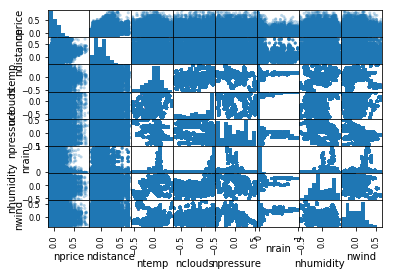

In [423]:
pd.plotting.scatter_matrix(merged_df[['nprice', 'ndistance', 'ntemp', 'nclouds', 'npressure',
                                      'nrain', 'nhumidity', 'nwind']], alpha=.3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9959bf4d30>,
      dtype=object)

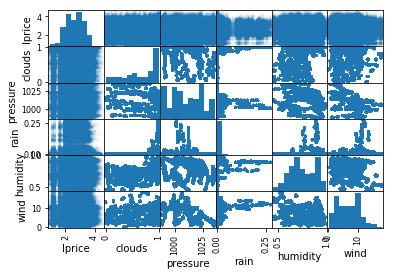

In [164]:
pd.plotting.scatter_matrix(merged_df[['lprice', 'clouds', 'pressure', 'rain', 'humidity', 'wind']], alpha = .05)

In [81]:
merged_df.corr()

,distance,price,surge_multiplier,temp,clouds,pressure,rain,humidity,wind,cab_type_Lyft,...,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
distance,1.000000,0.345082,0.025830,-0.003099,0.000342,0.003708,0.000789,-0.003740,-0.004251,-1.929998e-03,...,-0.000515,-0.000622,-0.000651,-0.000569,-0.000642,NaN,6.052217e-04,0.000524,0.000574,0.000577
price,0.345082,1.000000,0.240325,0.000005,0.001290,0.001012,0.000710,-0.001704,-0.001185,8.344084e-02,...,0.206547,0.500083,-0.219748,-0.039171,-0.333225,NaN,-2.569535e-01,-0.223527,-0.028578,-0.223570
surge_multiplier,0.025830,0.240325,1.000000,-0.001635,-0.001996,-0.002912,-0.001067,-0.001253,0.001286,1.637199e-01,...,0.068319,0.068519,0.071222,0.071166,-0.046650,NaN,-4.854270e-02,-0.048536,-0.048546,-0.048542
temp,-0.003099,0.000005,-0.001635,1.000000,0.437995,-0.377918,0.133400,0.366563,0.120664,1.926454e-03,...,-0.000582,0.001017,0.001175,0.001217,0.000318,NaN,-2.453412e-04,-0.002278,-0.001497,-0.000410
clouds,0.000342,0.001290,-0.001996,0.437995,1.000000,-0.210674,0.210941,0.509777,0.125876,-1.838530e-03,...,-0.001767,0.000983,-0.001790,0.001140,-0.000657,NaN,-9.199194e-04,0.000712,-0.000824,0.000376
pressure,0.003708,0.001012,-0.002912,-0.377918,-0.210674,1.000000,-0.069215,-0.132083,-0.569770,4.943372e-04,...,0.001093,0.001252,0.000350,-0.001506,-0.000845,NaN,1.021110e-04,0.000750,-0.000481,-0.000594
rain,0.000789,0.000710,-0.001067,0.133400,0.210941,-0.069215,1.000000,0.209892,0.218114,-3.075045e-03,...,-0.000867,-0.001492,-0.001808,-0.000359,-0.001892,NaN,1.424031e-03,0.000343,0.000167,-0.000426
humidity,-0.003740,-0.001704,-0.001253,0.366563,0.509777,-0.132083,0.209892,1.000000,-0.208435,-1.611857e-03,...,-0.000856,-0.000467,-0.001110,0.000948,-0.000815,NaN,3.347317e-04,0.000439,0.000012,0.000126
wind,-0.004251,-0.001185,0.001286,0.120664,0.125876,-0.569770,0.218114,-0.208435,1.000000,-4.234275e-03,...,-0.001954,-0.001899,-0.002297,0.000827,0.000135,NaN,1.390014e-03,0.001637,0.000142,0.000997
cab_type_Lyft,-0.001930,0.083441,0.163720,0.001926,-0.001839,0.000494,-0.003075,-0.001612,-0.004234,1.000000e+00,...,0.306438,0.306432,0.306396,0.306419,0.306386,NaN,-2.964984e-01,-0.296457,-0.296519,-0.296492


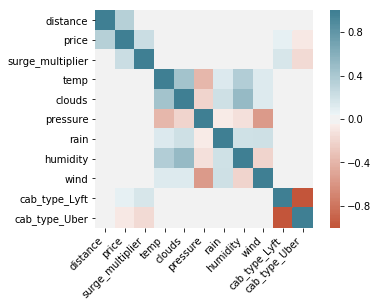

In [166]:
corr = merged_df[['distance', 'price', 'surge_multiplier', 'merge_date', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind',
       'cab_type_Lyft', 'cab_type_Uber']].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

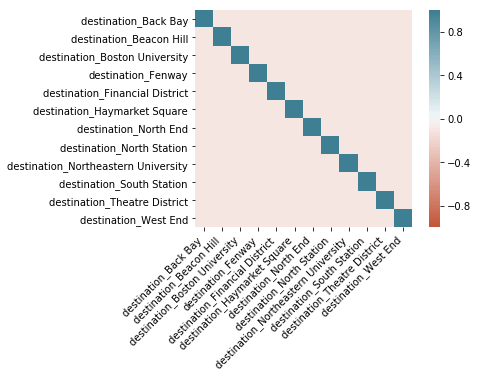

In [295]:
corr = merged_df[['destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End']].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## OLS

### Spec 1: normalized numerical and all raw one hot encoded dummies minus one

In [389]:
X = merged_df[['ndistance', 'ntemp', 'nclouds', 'npressure',
       'nrain', 'nhumidity', 'nwind', 'surge_multiplier', 'cab_type_Uber', 'destination_Back Bay',
       'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End', 'source_Back Bay', 
       'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'name_Black',
       'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL',
       'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_Taxi',
       'name_UberPool', 'name_UberX', 'name_UberXL', 'day_Fri',
       'day_Mon', 'day_Sat', 'day_Thu', 'day_Tue', 'day_Wed',
       'AMPM_PM', 'month_Dec', 'week_47', 'week_48',
       'week_49', 'sports', 'wkndPM']]
X = sm.add_constant(X)
Y = merged_df['nprice']

/Users/ptw/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [390]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = .2, random_state=42)

In [391]:
X_train.shape

(508193, 57)

In [392]:
X_test.shape

(127049, 57)

In [393]:
Y_train.shape

(508193,)

In [394]:
Y_test.shape

(127049,)

In [395]:
model = sm.OLS(Y_train, X_train).fit()

In [396]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 nprice   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 1.247e+05
Date:                Tue, 30 Jul 2019   Prob (F-statistic):               0.00
Time:                        08:15:35   Log-Likelihood:             1.1296e+06
No. Observations:              508193   AIC:                        -2.259e+06
Df Residuals:                  508139   BIC:                        -2.258e+06
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.1680      0.000   -381.566      0.000      -0.169      -0.167
ndistance                               0.2384      0.000    719.946      0.000       0.238       0.239
ntemp                                  -0.0003      0.000     -0.792      0.428      -0.001       0.000
nclouds                                -0.0002      0.000     -1.328      0.184      -0.001       0.000
npressure                              -0.0004      0.000     -0.868      0.385      -0.001       0.000
nrain                                -3.68e-06      0.000     -0.008      0.993      -0.001       0.001
nhumidity                              -0.0004      0.000     -1.491      0.136      -0.001       0.000
nwind                                   0.0002      0.000      0.699      0.485      -0.000       0.001
surge_multiplier                        0.1937      0.000    490.708      0.000       0.193       0.194
cab_type_Uber                          -0.0874      0.000   -678.324      0.000      -0.088      -0.087
destination_Back Bay                    0.0032      0.000     17.989      0.000       0.003       0.004
destination_Boston University          -0.0147      0.000    -94.435      0.000      -0.015      -0.014
destination_Fenway                     -0.0180      0.000   -116.676      0.000      -0.018      -0.018
destination_Financial District          0.0075      0.000     41.409      0.000       0.007       0.008
destination_Haymarket Square           -0.0122      0.000    -77.626      0.000      -0.013      -0.012
destination_North End                  -0.0139      0.000    -90.285      0.000      -0.014      -0.014
destination_North Station               0.0054      0.000     30.090      0.000       0.005       0.006
destination_Northeastern University    -0.0145      0.000    -94.969      0.000      -0.015      -0.014
destination_South Station              -0.0149      0.000    -96.161      0.000      -0.015      -0.015
destination_Theatre District            0.0058      0.000     31.883      0.000       0.005       0.006
destination_West End                    0.0027      0.000     15.239      0.000       0.002       0.003
source_Back Bay                         0.0032      0.000     17.943      0.000       0.003       0.004
source_Boston University               -0.0170      0.000   -108.217      0.000      -0.017      -0.017
source_Fenway                          -0.0149      0.000    -96.397      0.000      -0.015      -0.015
source_Financial District               0.0070      0.000     38.580      0.000       0.007       0.007
source_Haymarket Square                -0.0101      0.000    -64.394      0.000      -0.010      -0.010
source_North End                       -0.0083      0.000    -54.49

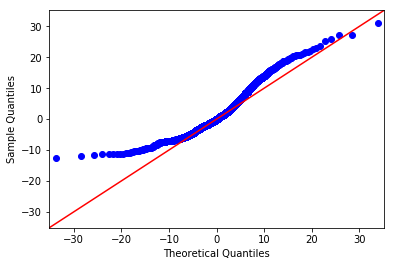

In [424]:
res = model.resid # residuals
fig = sm.qqplot(res, stats.t, fit=True, line=str(45))
plt.show()

## Lasso & Ridge

In [400]:
from sklearn.linear_model import LassoCV
lasso1 = LassoCV()
lasso1.fit(X_train, Y_train)
preds1 = lasso1.predict(X_test)
lasso1.coef_

/Users/ptw/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([ 0.00000000e+00,  2.36604759e-01, -0.00000000e+00, -7.85266808e-05,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        1.92163950e-01, -5.08229400e-02,  2.25775105e-03, -0.00000000e+00,
       -3.25260212e-03,  6.58738717e-03,  1.87465932e-03,  2.58851577e-04,
        4.47661164e-03,  0.00000000e+00, -4.10740346e-04,  4.74137270e-03,
        1.75540264e-03,  2.28325726e-03, -2.19866722e-03, -1.72618056e-04,
        6.20434858e-03,  3.95998140e-03,  5.87707571e-03,  3.12785862e-03,
       -2.58049471e-03,  2.05220738e-03,  7.91313222e-03,  3.08112055e-03,
        1.12780079e-01,  2.15529945e-01,  2.59525554e-02,  8.17670905e-02,
        1.79156914e-01, -5.97313916e-02,  0.00000000e+00, -9.01833247e-02,
        0.00000000e+00, -1.07774855e-02, -1.20401021e-04,  6.16045733e-02,
       -1.70885710e-04, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  3.07667377e-05,  0.00000000e+00,
        2.28108464e-05, -

In [401]:
lasso1.score(X_test, Y_test)

0.9283869142586708

In [402]:
lasso1_res = Y_test - preds1

In [403]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(Y_test, preds1)

In [404]:
mse1

0.0006920655128037391

In [405]:
Y_test.mean()

2.8126533036667544e-05

In [407]:
mse1/(Y_test.mean())

24.605432596385707

(array([2.0000e+00, 4.0000e+00, 4.0000e+00, 2.0000e+00, 1.6000e+01,
        4.3000e+01, 8.7000e+01, 1.8200e+02, 2.7000e+02, 5.1400e+02,
        1.5460e+03, 5.8060e+03, 1.6355e+04, 3.3437e+04, 3.2499e+04,
        2.1969e+04, 7.8620e+03, 3.2880e+03, 1.2830e+03, 7.6700e+02,
        3.5100e+02, 2.2200e+02, 1.3900e+02, 1.0600e+02, 6.8000e+01,
        5.3000e+01, 3.8000e+01, 3.0000e+01, 1.9000e+01, 2.6000e+01,
        1.8000e+01, 1.0000e+01, 4.0000e+00, 1.0000e+01, 1.0000e+01,
        2.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-0.20610447, -0.19164454, -0.1771846 , -0.16272467, -0.14826474,
        -0.1338048 , -0.11934487, -0.10488493, -0.090425  , -0.07596507,
        -0.06150513, -0.0470452 , -0.03258527, -0.01812533, -0.0036654 ,
         0.01079453,  0.02525447,  0.0397144 ,  0.05417434,  0.06863427,
         0.0830942 ,  0.09

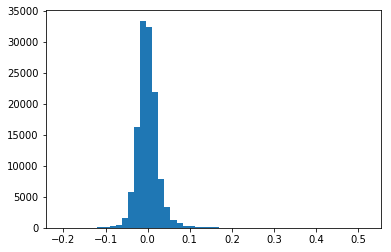

In [408]:
plt.hist(lasso1_res, bins=50)

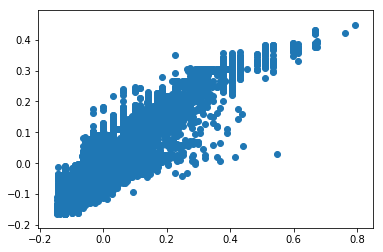

In [409]:
plt.scatter(Y_test, preds1)

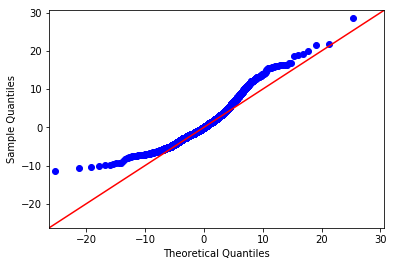

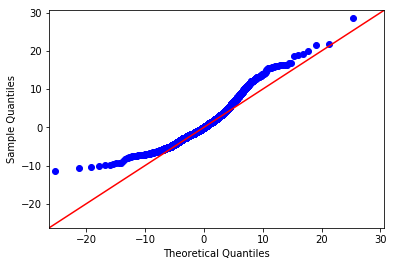

In [410]:
import scipy.stats as stats
sm.qqplot(lasso1_res, stats.t, fit=True, line=str(45))

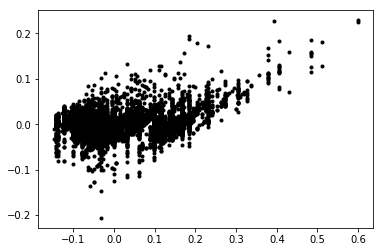

In [427]:
plt.plot(Y_train[:10000], res[:10000], 'k.')

In [428]:
X_train.loc[res[res > 0.15].index, :]

,const,ndistance,ntemp,nclouds,npressure,nrain,nhumidity,nwind,surge_multiplier,cab_type_Uber,...,day_Thu,day_Tue,day_Wed,AMPM_PM,month_Dec,week_47,week_48,week_49,sports,wkndPM
1015023,1.0,0.075399,0.099406,0.332153,0.102447,0.070718,0.319829,0.042620,2.00,0,...,0,0,0,0,1,0,1,0,0,0
984246,1.0,0.410858,-0.204589,-0.197847,0.224060,-0.020523,0.116125,-0.130198,1.25,0,...,0,0,0,0,1,1,0,0,0,0
439451,1.0,0.113664,0.197478,0.332153,-0.001244,-0.020523,0.356866,0.008504,1.00,1,...,0,0,0,0,1,0,1,0,0,0
540253,1.0,0.287133,0.066157,-0.197847,-0.030260,-0.020523,-0.346838,0.184679,1.75,0,...,1,0,0,1,0,1,0,0,1,0
477258,1.0,0.016725,0.040451,0.162153,-0.344320,-0.020523,-0.217209,0.129869,1.00,1,...,0,0,1,1,0,1,0,0,0,0
576871,1.0,0.292235,-0.264103,-0.467847,0.268225,-0.020523,-0.291283,-0.074270,1.00,1,...,0,0,0,1,1,0,0,1,0,1
90614,1.0,0.276929,0.067274,-0.137847,-0.133951,-0.020523,-0.217209,0.054925,1.75,0,...,0,0,0,1,1,0,1,0,0,0
1073003,1.0,0.302439,0.149979,0.332153,0.284654,-0.020523,0.227236,-0.036239,1.50,0,...,0,0,0,1,1,0,0,1,1,1
221188,1.0,0.285858,0.049672,-0.237847,0.304282,-0.020523,-0.069060,-0.040154,1.50,0,...,0,0,0,1,1,0,0,1,0,1
15499,1.0,0.109837,0.149420,0.322153,-0.414728,0.113419,0.375384,-0.047984,1.00,1,...,0,1,0,0,0,1,0,0,0,0


In [412]:
from sklearn.linear_model import RidgeCV
ridge1 = RidgeCV()
ridge1.fit(X_train, Y_train)
preds1r = ridge1.predict(X_test)
ridge1.coef_

array([ 0.00000000e+00,  2.38360828e-01, -3.19630256e-04, -2.13593309e-04,
       -3.85054916e-04, -3.64500306e-06, -4.25858397e-04,  2.23471059e-04,
        1.93652460e-01, -6.33818668e-02,  3.24307338e-03, -6.76670201e-04,
       -4.00486115e-03,  7.46014817e-03,  1.79290170e-03,  1.14821569e-04,
        5.44053114e-03, -4.88006889e-04, -8.80446698e-04,  5.76681366e-03,
        2.74894156e-03,  3.23966522e-03, -3.03182275e-03, -9.49889590e-04,
        7.02042042e-03,  3.91126788e-03,  5.72560979e-03,  4.07489098e-03,
       -3.33389709e-03,  1.82099343e-03,  8.87234341e-03,  4.05491509e-03,
        1.13245307e-01,  2.15996641e-01,  1.38151819e-02,  6.96332048e-02,
        1.67023450e-01, -7.21990231e-02, -1.22978919e-02, -1.02593055e-01,
        0.00000000e+00, -1.06197383e-02,  3.56986481e-05,  6.20696824e-02,
       -7.56567410e-04, -2.52653948e-04, -3.14063870e-04, -6.97865051e-04,
       -5.30760029e-04, -6.93374653e-04, -1.92178354e-05,  1.00545057e-04,
        4.15640284e-04,  

In [413]:
ridge1.score(X_test, Y_test)

0.9284006092382935

In [414]:
ridge1_res = Y_test - preds1r

In [416]:
from sklearn.metrics import mean_squared_error
mse1r = mean_squared_error(Y_test, preds1r)

In [417]:
mse1r

0.0006919331651608838

In [420]:
mse1r/Y_test.mean()

24.600727158901368

(array([2.0000e+00, 4.0000e+00, 4.0000e+00, 2.0000e+00, 1.5000e+01,
        4.0000e+01, 8.6000e+01, 1.7000e+02, 2.5800e+02, 5.0400e+02,
        1.3540e+03, 4.9030e+03, 1.4475e+04, 3.2767e+04, 3.3319e+04,
        2.3085e+04, 9.1400e+03, 3.5920e+03, 1.3930e+03, 7.7900e+02,
        3.7800e+02, 2.2500e+02, 1.4600e+02, 1.1100e+02, 7.0000e+01,
        5.2000e+01, 3.8000e+01, 3.1000e+01, 1.9000e+01, 2.5000e+01,
        1.9000e+01, 9.0000e+00, 5.0000e+00, 1.0000e+01, 1.0000e+01,
        2.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-0.20819987, -0.19369907, -0.17919827, -0.16469746, -0.15019666,
        -0.13569586, -0.12119505, -0.10669425, -0.09219345, -0.07769264,
        -0.06319184, -0.04869103, -0.03419023, -0.01968943, -0.00518862,
         0.00931218,  0.02381298,  0.03831379,  0.05281459,  0.0673154 ,
         0.0818162 ,  0.09

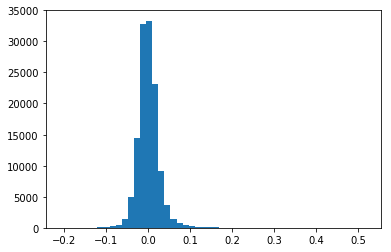

In [419]:
plt.hist(ridge1_res, bins=50)

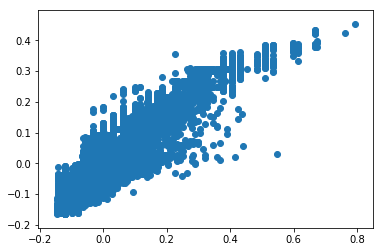

In [421]:
plt.scatter(Y_test, preds1r)

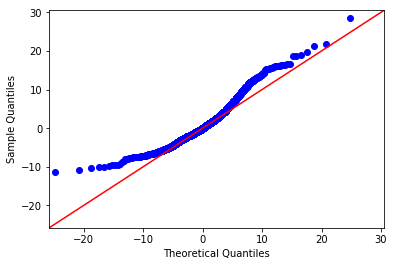

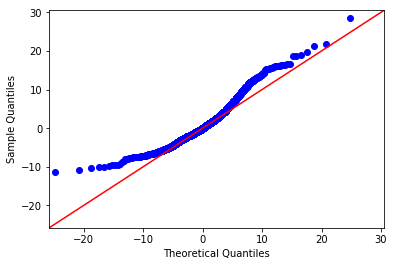

In [422]:
sm.qqplot(ridge1_res, stats.t, fit=True, line=str(45))

### Spec 2: normalized numerical and all raw one hot encoded dummies minus one and rain dummy

In [280]:
merged_df.columns

Index(['distance', 'price', 'surge_multiplier', 'time', 'merge_date', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind', 'rushhr',
       'cab_type_Lyft', 'cab_type_Uber', 'destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End', 'source_Back Bay', 'source_Beacon Hill',
       'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'name_Black',
       'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black 

In [281]:
X = merged_df[['ndistance', 'ntemp', 'nclouds', 'npressure',
       'nhumidity', 'nwind', 'surge_multiplier', 'cab_type_Uber', 'destination_Back Bay',
       'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End', 'source_Back Bay', 
       'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'name_Black',
       'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL',
       'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_Taxi',
       'name_UberPool', 'name_UberX', 'name_UberXL', 'day_Fri',
       'day_Mon', 'day_Sat', 'day_Thu', 'day_Tue', 'day_Wed',
       'AMPM_PM', 'month_Dec', 'week_47', 'week_48',
       'week_49', 'sports', 'wkndPM', 'rain_d']]
X = sm.add_constant(X)
Y = merged_df['nprice']

/Users/ptw/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [282]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = .2, random_state=42)

In [283]:
X_train.shape

(508193, 57)

In [284]:
X_test.shape

(127049, 57)

In [285]:
Y_train.shape

(508193,)

In [286]:
Y_test.shape

(127049,)

In [287]:
model = sm.OLS(Y_train, X_train).fit()

In [288]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 nprice   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 1.247e+05
Date:                Tue, 30 Jul 2019   Prob (F-statistic):               0.00
Time:                        07:48:48   Log-Likelihood:             1.1296e+06
No. Observations:              508193   AIC:                        -2.259e+06
Df Residuals:                  508139   BIC:                        -2.258e+06
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.1680      0.000   -381.771      0.000      -0.169      -0.167
ndistance                               0.2384      0.000    719.950      0.000       0.238       0.239
ntemp                                  -0.0003      0.000     -0.791      0.429      -0.001       0.000
nclouds                                -0.0002      0.000     -1.474      0.140      -0.001    7.84e-05
npressure                              -0.0005      0.000     -1.130      0.259      -0.001       0.000
nhumidity                              -0.0005      0.000     -1.784      0.074      -0.001    5.18e-05
nwind                                6.043e-05      0.000      0.186      0.853      -0.001       0.001
surge_multiplier                        0.1937      0.000    490.710      0.000       0.193       0.194
cab_type_Uber                          -0.0874      0.000   -678.421      0.000      -0.088      -0.087
destination_Back Bay                    0.0032      0.000     17.989      0.000       0.003       0.004
destination_Boston University          -0.0147      0.000    -94.442      0.000      -0.015      -0.014
destination_Fenway                     -0.0180      0.000   -116.678      0.000      -0.018      -0.018
destination_Financial District          0.0075      0.000     41.410      0.000       0.007       0.008
destination_Haymarket Square           -0.0122      0.000    -77.629      0.000      -0.013      -0.012
destination_North End                  -0.0139      0.000    -90.289      0.000      -0.014      -0.014
destination_North Station               0.0054      0.000     30.092      0.000       0.005       0.006
destination_Northeastern University    -0.0145      0.000    -94.976      0.000      -0.015      -0.014
destination_South Station              -0.0149      0.000    -96.168      0.000      -0.015      -0.015
destination_Theatre District            0.0058      0.000     31.886      0.000       0.005       0.006
destination_West End                    0.0027      0.000     15.244      0.000       0.002       0.003
source_Back Bay                         0.0032      0.000     17.938      0.000       0.003       0.004
source_Boston University               -0.0170      0.000   -108.226      0.000      -0.017      -0.017
source_Fenway                          -0.0149      0.000    -96.400      0.000      -0.015      -0.015
source_Financial District               0.0070      0.000     38.566      0.000       0.007       0.007
source_Haymarket Square                -0.0101      0.000    -64.406      0.000      -0.010      -0.010
source_North End                       -0.0083      0.000    -54.501      0.000      -0.009      -0.008
source_North Station                    0.0041      0.000     22.46

In [289]:
from sklearn.linear_model import LassoCV
lasso = LassoCV()
lasso.fit(X_train, Y_train)
preds = lasso.predict(X_test)
lasso.coef_

/Users/ptw/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([ 0.00000000e+00,  2.36604759e-01, -0.00000000e+00, -7.85266808e-05,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  1.92163950e-01,
       -5.08229400e-02,  2.25775105e-03, -0.00000000e+00, -3.25260212e-03,
        6.58738717e-03,  1.87465932e-03,  2.58851577e-04,  4.47661164e-03,
        0.00000000e+00, -4.10740346e-04,  4.74137270e-03,  1.75540264e-03,
        2.28325726e-03, -2.19866722e-03, -1.72618056e-04,  6.20434858e-03,
        3.95998140e-03,  5.87707571e-03,  3.12785862e-03, -2.58049471e-03,
        2.05220738e-03,  7.91313222e-03,  3.08112055e-03,  1.12780079e-01,
        2.15529945e-01,  2.59525554e-02,  8.17670905e-02,  1.79156914e-01,
       -5.97313916e-02,  0.00000000e+00, -9.01833247e-02,  0.00000000e+00,
       -1.07774855e-02, -1.20401021e-04,  6.16045733e-02, -1.70885710e-04,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  3.07667377e-05,  0.00000000e+00,  2.28108464e-05,
       -0.00000000e+00, -

In [290]:
lasso.score(X_test, Y_test)

0.9283869142586708

In [291]:
lasso_res = Y_test - preds

In [292]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, preds)

In [293]:
mse

0.000692065512803739

In [294]:
Y_test.mean()

2.8126533036667544e-05

In [334]:
mse/Y_test.mean()

89.70619371967108

(array([2.0000e+00, 4.0000e+00, 4.0000e+00, 2.0000e+00, 1.6000e+01,
        4.3000e+01, 8.7000e+01, 1.8200e+02, 2.7000e+02, 5.1400e+02,
        1.5460e+03, 5.8060e+03, 1.6355e+04, 3.3437e+04, 3.2499e+04,
        2.1969e+04, 7.8620e+03, 3.2880e+03, 1.2830e+03, 7.6700e+02,
        3.5100e+02, 2.2200e+02, 1.3900e+02, 1.0600e+02, 6.8000e+01,
        5.3000e+01, 3.8000e+01, 3.0000e+01, 1.9000e+01, 2.6000e+01,
        1.8000e+01, 1.0000e+01, 4.0000e+00, 1.0000e+01, 1.0000e+01,
        2.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-0.20610447, -0.19164454, -0.1771846 , -0.16272467, -0.14826474,
        -0.1338048 , -0.11934487, -0.10488493, -0.090425  , -0.07596507,
        -0.06150513, -0.0470452 , -0.03258527, -0.01812533, -0.0036654 ,
         0.01079453,  0.02525447,  0.0397144 ,  0.05417434,  0.06863427,
         0.0830942 ,  0.09

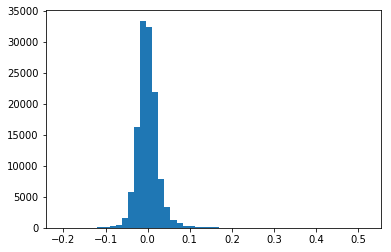

In [295]:
plt.hist(Y_test - preds, bins=50)

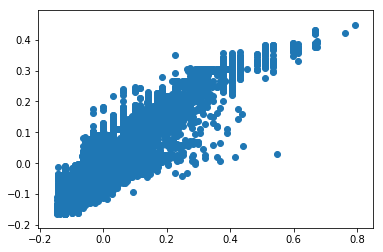

In [296]:
plt.scatter(Y_test, preds)

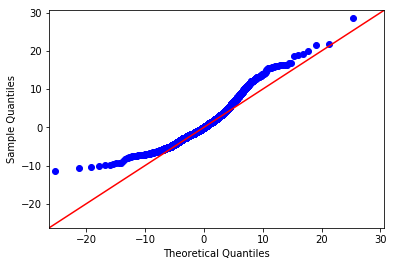

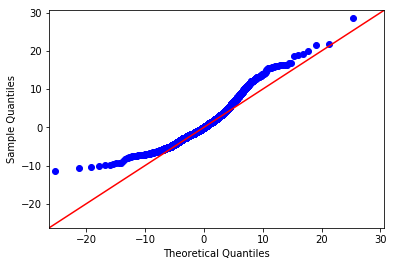

In [297]:
import scipy.stats as stats
sm.qqplot(lasso_res, stats.t, fit=True, line=str(45))

In [298]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV()
ridge.fit(X_train, Y_train)
preds = ridge.predict(X_test)
ridge.coef_

array([ 0.00000000e+00,  2.38360905e-01, -3.17593990e-04, -2.38238787e-04,
       -5.12070680e-04, -5.24554947e-04,  6.04278926e-05,  1.93653110e-01,
       -6.33817252e-02,  3.24306874e-03, -6.76727255e-04, -4.00387208e-03,
        7.46015182e-03,  1.79335591e-03,  1.15064199e-04,  5.44071881e-03,
       -4.88269469e-04, -8.81081611e-04,  5.76745925e-03,  2.74983145e-03,
        3.23876303e-03, -3.03248813e-03, -9.49135969e-04,  7.01815517e-03,
        3.91059707e-03,  5.72609288e-03,  4.07278519e-03, -3.33320145e-03,
        1.81966592e-03,  8.87312706e-03,  4.05563461e-03,  1.13245226e-01,
        2.15996535e-01,  1.38150879e-02,  6.96331677e-02,  1.67023606e-01,
       -7.21989422e-02, -1.22979719e-02, -1.02593222e-01,  0.00000000e+00,
       -1.06197290e-02,  3.54854719e-05,  6.20696970e-02, -7.00006222e-04,
       -2.36159024e-04, -2.38412965e-04, -6.58746314e-04, -5.14555403e-04,
       -6.57143337e-04, -1.97209982e-05,  9.37726526e-05,  3.48302754e-04,
       -4.43934449e-05,  

In [299]:
ridge.score(X_test, Y_test)

0.9283987862257391

In [300]:
ridge_res = Y_test - preds

In [301]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, preds)

In [302]:
mse

0.0006919507826689858

In [303]:
Y_test.mean()

2.8126533036667544e-05

(array([2.0000e+00, 4.0000e+00, 4.0000e+00, 2.0000e+00, 1.5000e+01,
        4.1000e+01, 8.5000e+01, 1.7000e+02, 2.5800e+02, 5.0400e+02,
        1.3560e+03, 4.8970e+03, 1.4503e+04, 3.2749e+04, 3.3321e+04,
        2.3081e+04, 9.1380e+03, 3.5940e+03, 1.3900e+03, 7.7800e+02,
        3.8000e+02, 2.2300e+02, 1.4600e+02, 1.1100e+02, 7.0000e+01,
        5.2000e+01, 3.8000e+01, 3.1000e+01, 1.9000e+01, 2.5000e+01,
        1.9000e+01, 9.0000e+00, 5.0000e+00, 1.0000e+01, 1.0000e+01,
        2.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-0.20819947, -0.19369839, -0.17919731, -0.16469623, -0.15019515,
        -0.13569407, -0.12119299, -0.10669191, -0.09219083, -0.07768975,
        -0.06318867, -0.04868759, -0.03418651, -0.01968543, -0.00518434,
         0.00931674,  0.02381782,  0.0383189 ,  0.05281998,  0.06732106,
         0.08182214,  0.09

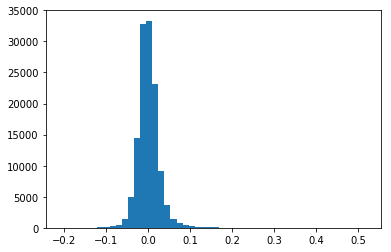

In [304]:
plt.hist(Y_test - preds, bins=50)

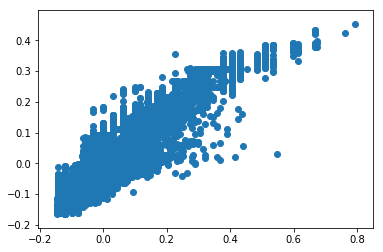

In [305]:
plt.scatter(Y_test, preds)

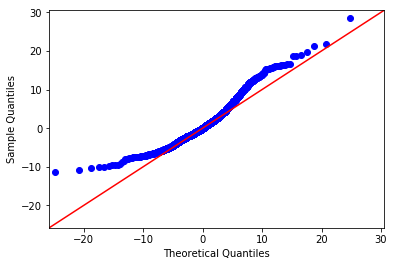

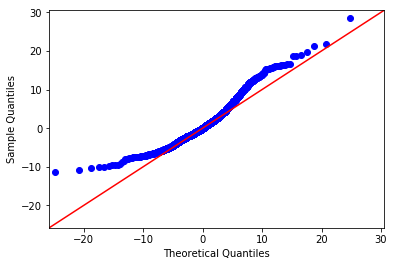

In [306]:
sm.qqplot(ridge_res, stats.t, fit=True, line=str(45))

### Spec 3: normalized numerical and rain and selected dummies

In [280]:
merged_df.columns

Index(['distance', 'price', 'surge_multiplier', 'time', 'merge_date', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind', 'rushhr',
       'cab_type_Lyft', 'cab_type_Uber', 'destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End', 'source_Back Bay', 'source_Beacon Hill',
       'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'name_Black',
       'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black 

In [307]:
X = merged_df[['ndistance', 'ntemp', 'nclouds', 'npressure',
       'nhumidity', 'nwind', 'surge_multiplier', 'cab_type_Uber', 'destination_Back Bay',
       'source_Beacon Hill',
       'destination_Haymarket Square', 'destination_Northeastern University',
       'source_Back Bay', 'day_Fri',
       'AMPM_PM', 'month_Dec', 'sports', 'wkndPM', 'rain_d', 'Black']]
X = sm.add_constant(X)
Y = merged_df['nprice']

/Users/ptw/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [308]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = .2, random_state=42)

In [309]:
X_train.shape

(508193, 21)

In [310]:
X_test.shape

(127049, 21)

In [311]:
Y_train.shape

(508193,)

In [312]:
Y_test.shape

(127049,)

In [313]:
model = sm.OLS(Y_train, X_train).fit()

In [314]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 nprice   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                 7.202e+04
Date:                Tue, 30 Jul 2019   Prob (F-statistic):               0.00
Time:                        07:57:46   Log-Likelihood:             8.0033e+05
No. Observations:              508193   AIC:                        -1.601e+06
Df Residuals:                  508172   BIC:                        -1.600e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.2632      0.001   -330.508      0.000      -0.265      -0.262
ndistance                               0.2301      0.001    457.661      0.000       0.229       0.231
ntemp                               -3.952e-06      0.000     -0.008      0.994      -0.001       0.001
nclouds                             -5.538e-06      0.000     -0.019      0.985      -0.001       0.001
npressure                            6.986e-05      0.000      0.158      0.874      -0.001       0.001
nhumidity                              -0.0001      0.000     -0.258      0.797      -0.001       0.001
nwind                                3.936e-06      0.001      0.008      0.994      -0.001       0.001
surge_multiplier                        0.2137      0.001    285.615      0.000       0.212       0.215
cab_type_Uber                          -0.0099      0.000    -69.131      0.000      -0.010      -0.010
destination_Back Bay                   -0.0010      0.000     -3.998      0.000      -0.002      -0.001
source_Beacon Hill                     -0.0064      0.000    -24.706      0.000      -0.007      -0.006
destination_Haymarket Square            0.0022      0.000      8.395      0.000       0.002       0.003
destination_Northeastern University     0.0011      0.000      4.125      0.000       0.001       0.002
source_Back Bay                        -0.0035      0.000    -13.573      0.000      -0.004      -0.003
day_Fri                                -0.0005      0.000     -1.735      0.083      -0.001    5.94e-05
AMPM_PM                             -1.192e-07      0.000     -0.001      1.000      -0.000       0.000
month_Dec                              -0.0001      0.000     -0.745      0.457      -0.001       0.000
sports                               7.155e-05      0.000      0.247      0.805      -0.000       0.001
wkndPM                                  0.0003      0.000      0.809      0.418      -0.000       0.001
rain_d                               5.135e-05      0.000      0.212      0.832      -0.000       0.001
Black                                   0.1564      0.000   1048.464      0.000       0.156       0.157
==============================================================================
Omnibus:                    14065.274   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22185.083
Skew:                           0.272   Prob(JB):                         0.00
Kurtosis:                       3.867   Cond. No.                         27.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [315]:
from sklearn.linear_model import LassoCV
lasso = LassoCV()
lasso.fit(X_train, Y_train)
preds = lasso.predict(X_test)
lasso.coef_

/Users/ptw/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([ 0.00000000e+00,  2.28411345e-01,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  2.09838112e-01,
       -9.83414198e-03, -5.95810937e-04, -5.78147324e-03,  1.44448265e-03,
        5.68775207e-04, -2.83883666e-03, -8.59654908e-06,  1.22475266e-05,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.56231363e-01])

In [316]:
lasso.score(X_test, Y_test)

0.7388954436357262

In [317]:
lasso_res = Y_test - preds

In [318]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, preds)

In [319]:
mse

0.002523302226472103

In [320]:
Y_test.mean()

2.8126533036667544e-05

In [333]:
mse/Y_test.mean()

89.70619371967108

(array([2.0000e+00, 4.0000e+00, 4.0000e+00, 0.0000e+00, 1.1000e+01,
        4.5000e+01, 7.3000e+01, 1.3600e+02, 3.5600e+02, 7.2400e+02,
        3.2270e+03, 8.6120e+03, 1.1433e+04, 1.3802e+04, 1.6188e+04,
        1.3732e+04, 9.9470e+03, 1.4079e+04, 1.8294e+04, 8.4370e+03,
        3.7630e+03, 2.1830e+03, 8.3300e+02, 4.3800e+02, 2.2900e+02,
        1.4300e+02, 1.0300e+02, 7.3000e+01, 3.4000e+01, 2.8000e+01,
        2.8000e+01, 2.2000e+01, 3.0000e+01, 9.0000e+00, 7.0000e+00,
        8.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-0.26357368, -0.24689406, -0.23021444, -0.21353481, -0.19685519,
        -0.18017557, -0.16349595, -0.14681633, -0.13013671, -0.11345708,
        -0.09677746, -0.08009784, -0.06341822, -0.0467386 , -0.03005897,
        -0.01337935,  0.00330027,  0.01997989,  0.03665951,  0.05333914,
         0.07001876,  0.08

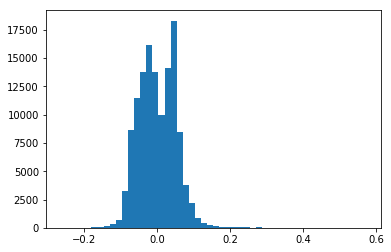

In [321]:
plt.hist(Y_test - preds, bins=50)

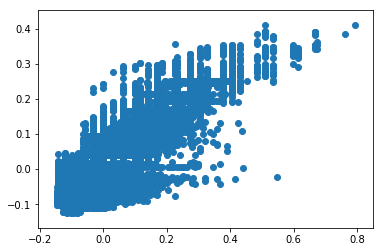

In [322]:
plt.scatter(Y_test, preds)

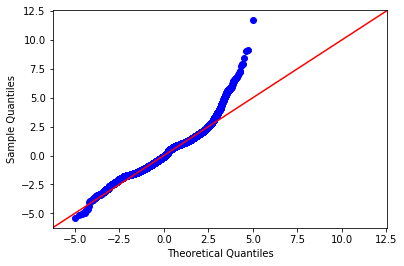

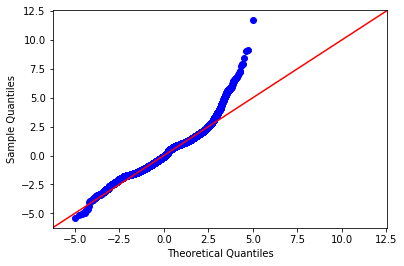

In [323]:
import scipy.stats as stats
sm.qqplot(lasso_res, stats.t, fit=True, line=str(45))

In [324]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV()
ridge.fit(X_train, Y_train)
preds = ridge.predict(X_test)
ridge.coef_

array([ 0.00000000e+00,  2.30087497e-01, -3.96657891e-06, -5.53355041e-06,
        6.98467904e-05, -1.13009338e-04,  3.92374855e-06,  2.13673355e-01,
       -9.85672630e-03, -1.03295361e-03, -6.43396286e-03,  2.22728003e-03,
        1.07526083e-03, -3.52440044e-03, -4.57257544e-04, -1.18789217e-07,
       -1.49422479e-04,  7.15489192e-05,  2.55757431e-04,  5.13431558e-05,
        1.56372817e-01])

In [325]:
ridge.score(X_test, Y_test)

0.7389138631393644

In [326]:
ridge_res = Y_test - preds

In [327]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, preds)

In [328]:
mse

0.0025231242212500273

In [329]:
Y_test.mean()

2.8126533036667544e-05

In [335]:
mse/Y_test.mean()

89.70619371967108

(array([2.0000e+00, 5.0000e+00, 3.0000e+00, 0.0000e+00, 1.1000e+01,
        2.9000e+01, 7.8000e+01, 1.1700e+02, 2.9500e+02, 6.0700e+02,
        2.0360e+03, 7.6920e+03, 1.0599e+04, 1.3870e+04, 1.5674e+04,
        1.4931e+04, 9.8590e+03, 1.2916e+04, 1.8382e+04, 1.1060e+04,
        4.1620e+03, 2.4800e+03, 9.9400e+02, 4.7000e+02, 2.6700e+02,
        1.4800e+02, 1.0300e+02, 7.5000e+01, 3.7000e+01, 3.1000e+01,
        3.1000e+01, 2.0000e+01, 2.7000e+01, 1.0000e+01, 9.0000e+00,
        7.0000e+00, 3.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-2.69021439e-01, -2.52234366e-01, -2.35447293e-01, -2.18660220e-01,
        -2.01873147e-01, -1.85086074e-01, -1.68299001e-01, -1.51511927e-01,
        -1.34724854e-01, -1.17937781e-01, -1.01150708e-01, -8.43636349e-02,
        -6.75765618e-02, -5.07894886e-02, -3.40024155e-02, -1.72153424e-02,
        -4.282

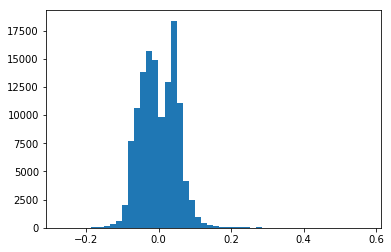

In [330]:
plt.hist(Y_test - preds, bins=50)

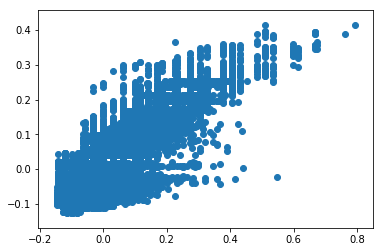

In [331]:
plt.scatter(Y_test, preds)

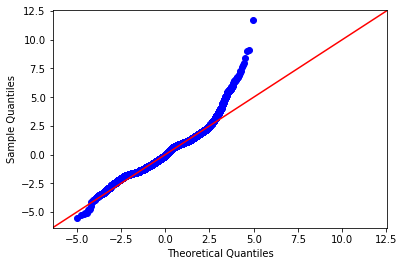

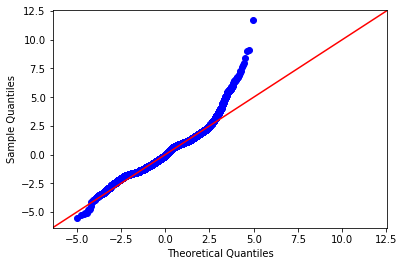

In [332]:
sm.qqplot(ridge_res, stats.t, fit=True, line=str(45))

### Spec 4: normalized numerical and rain and selected dummies and capped price at 40

In [358]:
merged_df40 = merged_df[(merged_df.price < 40)]

In [359]:
merged_df40.head()

,distance,price,surge_multiplier,time,merge_date,temp,location,clouds,pressure,rain,...,ldistance,nprice,ndistance,ntemp,nclouds,npressure,nrain,nhumidity,nwind,wkndPM
0,0.44,5.0,1.0,4,Haymarket Square - 2018-12-16 04,38.46,Haymarket Square,0.29,1022.25,0.0,...,-0.820981,-0.121517,-0.223071,-0.021298,-0.377847,0.256491,-0.020523,0.023532,0.04262,0
1,1.33,7.0,1.0,4,Haymarket Square - 2018-12-16 04,38.46,Haymarket Square,0.29,1022.25,0.0,...,0.285179,-0.100464,-0.109550,-0.021298,-0.377847,0.256491,-0.020523,0.023532,0.04262,0
2,0.53,27.5,1.0,4,Haymarket Square - 2018-12-16 04,38.46,Haymarket Square,0.29,1022.25,0.0,...,-0.634878,0.115325,-0.211591,-0.021298,-0.377847,0.256491,-0.020523,0.023532,0.04262,0
3,2.36,7.0,1.0,4,Haymarket Square - 2018-12-16 04,38.46,Haymarket Square,0.29,1022.25,0.0,...,0.858662,-0.100464,0.021827,-0.021298,-0.377847,0.256491,-0.020523,0.023532,0.04262,0
4,0.62,10.5,1.0,4,Haymarket Square - 2018-12-16 04,38.46,Haymarket Square,0.29,1022.25,0.0,...,-0.478036,-0.063622,-0.200112,-0.021298,-0.377847,0.256491,-0.020523,0.023532,0.04262,0


In [360]:
X = merged_df40[['ndistance', 'ntemp', 'nclouds', 'npressure',
       'nhumidity', 'nwind', 'surge_multiplier', 'cab_type_Uber', 'destination_Back Bay',
       'source_Beacon Hill',
       'destination_Haymarket Square', 'destination_Northeastern University',
       'source_Back Bay', 'day_Fri',
       'AMPM_PM', 'month_Dec', 'sports', 'wkndPM', 'rain_d', 'Black']]
X = sm.add_constant(X)
Y = merged_df40['nprice']

/Users/ptw/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [361]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = .2, random_state=42)

In [362]:
X_train.shape

(500827, 21)

In [363]:
X_test.shape

(125207, 21)

In [364]:
Y_train.shape

(500827,)

In [365]:
Y_test.shape

(125207,)

In [366]:
model = sm.OLS(Y_train, X_train).fit()

In [367]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 nprice   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                 6.501e+04
Date:                Tue, 30 Jul 2019   Prob (F-statistic):               0.00
Time:                        08:10:46   Log-Likelihood:             8.1476e+05
No. Observations:              500827   AIC:                        -1.629e+06
Df Residuals:                  500806   BIC:                        -1.629e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.2045      0.001   -232.809      0.000      -0.206      -0.203
ndistance                               0.2074      0.000    419.954      0.000       0.206       0.208
ntemp                                   0.0003      0.000      0.612      0.540      -0.001       0.001
nclouds                                -0.0001      0.000     -0.441      0.659      -0.001       0.000
npressure                               0.0002      0.000      0.586      0.558      -0.001       0.001
nhumidity                              -0.0003      0.000     -0.604      0.546      -0.001       0.001
nwind                               -5.427e-05      0.000     -0.113      0.910      -0.001       0.001
surge_multiplier                        0.1552      0.001    185.645      0.000       0.154       0.157
cab_type_Uber                          -0.0099      0.000    -72.744      0.000      -0.010      -0.010
destination_Back Bay                    0.0004      0.000      1.576      0.115   -9.44e-05       0.001
source_Beacon Hill                     -0.0047      0.000    -18.934      0.000      -0.005      -0.004
destination_Haymarket Square            0.0009      0.000      3.480      0.001       0.000       0.001
destination_Northeastern University     0.0026      0.000     10.600      0.000       0.002       0.003
source_Back Bay                        -0.0023      0.000     -9.328      0.000      -0.003      -0.002
day_Fri                                -0.0003      0.000     -1.137      0.255      -0.001       0.000
AMPM_PM                             -2.117e-05      0.000     -0.116      0.908      -0.000       0.000
month_Dec                              -0.0001      0.000     -0.654      0.513      -0.001       0.000
sports                                  0.0002      0.000      0.578      0.563      -0.000       0.001
wkndPM                               4.727e-05      0.000      0.156      0.876      -0.001       0.001
rain_d                               4.138e-05      0.000      0.179      0.858      -0.000       0.000
Black                                   0.1511      0.000   1051.372      0.000       0.151       0.151
==============================================================================
Omnibus:                     6087.057   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4775.113
Skew:                           0.159   Prob(JB):                         0.00
Kurtosis:                       2.643   Cond. No.                         32.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [368]:
from sklearn.linear_model import LassoCV
lasso = LassoCV()
lasso.fit(X_train, Y_train)
preds = lasso.predict(X_test)
lasso.coef_

/Users/ptw/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([ 0.00000000e+00,  2.05628053e-01,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  1.50211487e-01,
       -9.89115266e-03,  0.00000000e+00, -4.13988451e-03,  7.66638875e-05,
        2.11960525e-03, -1.73939897e-03, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        1.50884117e-01])

In [369]:
lasso.score(X_test, Y_test)

0.7208657674407197

In [370]:
lasso_res = Y_test - preds

In [371]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, preds)

In [372]:
mse

0.0022762397148714058

In [373]:
Y_test.mean()

-0.004684215255651006

In [374]:
mse/Y_test.mean()

-0.48593832491480093

(array([1.000e+00, 2.000e+00, 2.700e+01, 2.500e+01, 5.100e+01, 6.500e+01,
        1.360e+02, 2.520e+02, 3.520e+02, 6.470e+02, 2.302e+03, 4.640e+03,
        5.029e+03, 6.197e+03, 7.002e+03, 7.751e+03, 9.833e+03, 9.664e+03,
        9.199e+03, 5.819e+03, 4.647e+03, 5.350e+03, 7.474e+03, 9.172e+03,
        9.991e+03, 7.084e+03, 4.633e+03, 2.231e+03, 2.015e+03, 1.317e+03,
        1.036e+03, 5.390e+02, 2.130e+02, 1.260e+02, 7.600e+01, 6.000e+01,
        5.200e+01, 4.300e+01, 4.100e+01, 2.500e+01, 1.500e+01, 1.700e+01,
        1.200e+01, 1.100e+01, 1.200e+01, 5.000e+00, 4.000e+00, 4.000e+00,
        5.000e+00, 3.000e+00]),
 array([-0.17890671, -0.16974003, -0.16057335, -0.15140668, -0.14224   ,
        -0.13307332, -0.12390664, -0.11473996, -0.10557329, -0.09640661,
        -0.08723993, -0.07807325, -0.06890657, -0.0597399 , -0.05057322,
        -0.04140654, -0.03223986, -0.02307318, -0.01390651, -0.00473983,
         0.00442685,  0.01359353,  0.02276021,  0.03192688,  0.04109356,
         0.

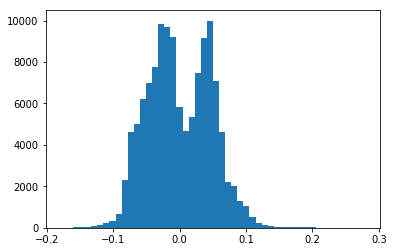

In [375]:
plt.hist(Y_test - preds, bins=50)

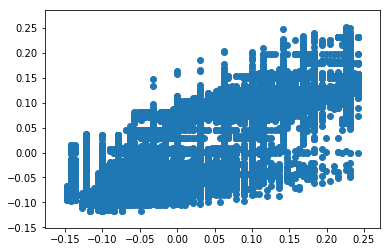

In [376]:
plt.scatter(Y_test, preds)

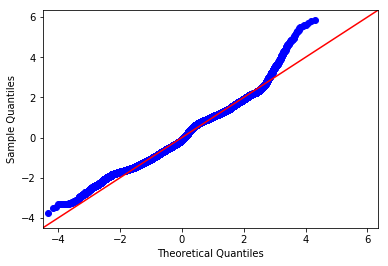

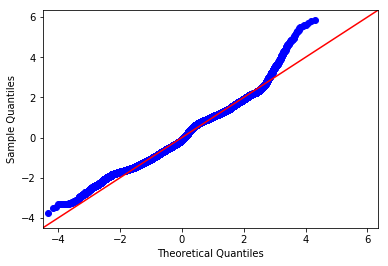

In [377]:
import scipy.stats as stats
sm.qqplot(lasso_res, stats.t, fit=True, line=str(45))

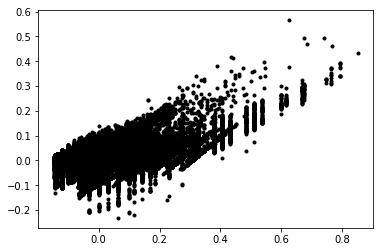

In [429]:
plt.plot(Y_train, res, 'k.')

In [378]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV()
ridge.fit(X_train, Y_train)
preds = ridge.predict(X_test)
ridge.coef_

array([ 0.00000000e+00,  2.07419223e-01,  2.91193798e-04, -1.22858966e-04,
        2.47205912e-04, -2.53104581e-04, -5.42836331e-05,  1.55184891e-01,
       -9.90147294e-03,  3.87599299e-04, -4.68191712e-03,  8.77337789e-04,
        2.64417416e-03, -2.31212753e-03, -2.86798141e-04, -2.11621372e-05,
       -1.25473777e-04,  1.60556840e-04,  4.72693140e-05,  4.13752444e-05,
        1.51070571e-01])

In [379]:
ridge.score(X_test, Y_test)

0.720941904759401

In [380]:
ridge_res = Y_test - preds

In [381]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, preds)

In [382]:
mse

0.00227561884230061

In [383]:
Y_test.mean()

-0.004684215255651006

In [384]:
mse/Y_test.mean()

-0.48580577921890306

(array([1.0000e+00, 2.0000e+00, 4.0000e+00, 3.4000e+01, 2.8000e+01,
        5.3000e+01, 9.1000e+01, 2.1200e+02, 2.3700e+02, 4.4800e+02,
        1.0890e+03, 3.3900e+03, 4.6820e+03, 5.8450e+03, 6.3970e+03,
        7.4390e+03, 8.5430e+03, 1.0214e+04, 9.8390e+03, 7.5190e+03,
        5.2750e+03, 5.0030e+03, 6.3140e+03, 8.3540e+03, 1.0634e+04,
        8.6010e+03, 5.6550e+03, 2.9670e+03, 2.0550e+03, 1.6170e+03,
        1.0970e+03, 7.6100e+02, 2.4000e+02, 1.5500e+02, 9.0000e+01,
        6.8000e+01, 4.6000e+01, 4.4000e+01, 4.6000e+01, 2.3000e+01,
        1.9000e+01, 1.6000e+01, 1.2000e+01, 1.4000e+01, 1.2000e+01,
        6.0000e+00, 4.0000e+00, 3.0000e+00, 6.0000e+00, 3.0000e+00]),
 array([-1.86256075e-01, -1.76953822e-01, -1.67651570e-01, -1.58349317e-01,
        -1.49047064e-01, -1.39744811e-01, -1.30442559e-01, -1.21140306e-01,
        -1.11838053e-01, -1.02535800e-01, -9.32335473e-02, -8.39312946e-02,
        -7.46290418e-02, -6.53267890e-02, -5.60245362e-02, -4.67222834e-02,
        -3.742

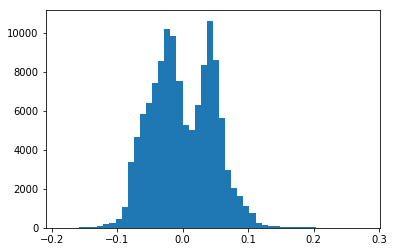

In [385]:
plt.hist(Y_test - preds, bins=50)

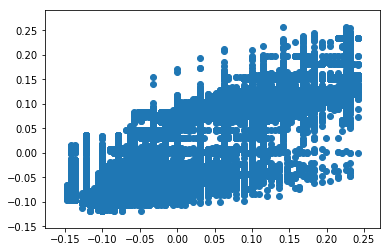

In [386]:
plt.scatter(Y_test, preds)

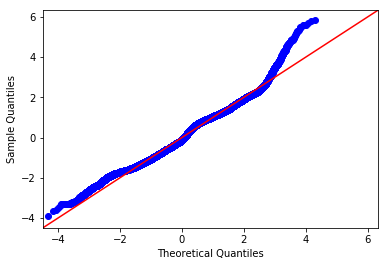

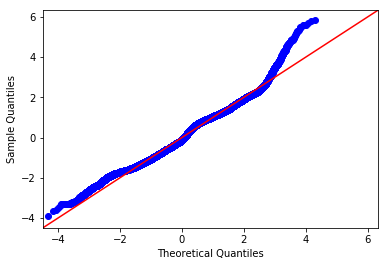

In [387]:
sm.qqplot(ridge_res, stats.t, fit=True, line=str(45))

## Notes

In [178]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
embeded_lr_selector = SelectFromModel(LassoCV(), max_features=20)
embeded_lr_selector.fit(X_train, Y_train)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X_train.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

/Users/ptw/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


20 selected features


In [179]:
embeded_lr_feature

['surge_multiplier',
 'destination_Beacon Hill',
 'destination_Financial District',
 'destination_North End',
 'destination_North Station',
 'source_Beacon Hill',
 'source_Financial District',
 'source_Theatre District',
 'name_Black',
 'name_Black SUV',
 'name_Lux',
 'name_Lux Black',
 'name_Lux Black XL',
 'name_Lyft',
 'name_Shared',
 'name_UberPool',
 'name_UberX',
 'name_UberXL',
 'name_WAV',
 'ldistance']

In [376]:
dataSet_df = merged_df[['distance', 'surge_multiplier', 'temp', 'clouds', 'pressure', 
                        'rain', 'humidity', 'wind', 'name_Black', 'name_Black SUV', 
                        'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft', 
                        'name_Lyft XL', 'name_Shared', 'name_Taxi', 'name_UberPool', 'name_UberX', 
                        'name_UberXL', 'name_WAV', 'destination_Back Bay', 'destination_Beacon Hill', 
                        'destination_Boston University', 'destination_Fenway', 'destination_Financial District',
                        'destination_Haymarket Square', 'destination_North End', 'destination_North Station', 
                        'destination_Northeastern University', 'destination_South Station', 
                        'destination_Theatre District', 'destination_West End', 'source_Back Bay', 
                        'source_Beacon Hill', 'source_Boston University', 'source_Fenway',
                        'source_Financial District', 'source_Haymarket Square',
                        'source_North End', 'source_North Station',
                        'source_Northeastern University', 'source_South Station',
                         'source_Theatre District', 'source_West End','price']]

In [377]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [378]:
XX= dataSet_df[['distance', 'surge_multiplier', 'temp', 'clouds', 'pressure', 
                        'rain', 'humidity', 'wind', 'name_Black', 'name_Black SUV', 
                        'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft', 
                        'name_Lyft XL', 'name_Shared', 'name_Taxi', 'name_UberPool', 'name_UberX', 
                        'name_UberXL', 'name_WAV', 'destination_Back Bay', 'destination_Beacon Hill', 
                        'destination_Boston University', 'destination_Fenway', 'destination_Financial District',
                        'destination_Haymarket Square', 'destination_North End', 'destination_North Station', 
                        'destination_Northeastern University', 'destination_South Station', 
                        'destination_Theatre District', 'destination_West End', 'source_Back Bay', 
                        'source_Beacon Hill', 'source_Boston University', 'source_Fenway',
                        'source_Financial District', 'source_Haymarket Square',
                        'source_North End', 'source_North Station',
                        'source_Northeastern University', 'source_South Station',
                         'source_Theatre District', 'source_West End']]
YY = dataSet_df['price']

In [379]:
X_train, X_test, y_train, y_test = train_test_split(XX.values, YY.values, test_size=0.33, random_state=42)

In [380]:
y_train.shape

(402552,)

In [381]:
regr = RandomForestRegressor(max_depth=4, random_state=137, n_estimators=1000)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=137, verbose=0, warm_start=False)

In [382]:
y_rf = regr.predict(X_test)

In [387]:
fimpDict = {}
for fimp in list(zip(XX.columns, regr.feature_importances_)):
    print(fimp)
    fimpDict.update({fimp[0]:fimp[1]})

('distance', 0.05951465433242029)
('surge_multiplier', 0.0025734811712555925)
('temp', 0.0)
('clouds', 0.0)
('pressure', 0.0)
('rain', 0.0)
('humidity', 0.0)
('wind', 0.0)
('name_Black', 0.1128144317338077)
('name_Black SUV', 0.33530052147261763)
('name_Lux', 0.0)
('name_Lux Black', 0.13720841559892896)
('name_Lux Black XL', 0.35236411865261175)
('name_Lyft', 0.0)
('name_Lyft XL', 0.0)
('name_Shared', 0.0)
('name_Taxi', 0.0)
('name_UberPool', 0.0)
('name_UberX', 0.0)
('name_UberXL', 0.0)
('name_WAV', 0.0)
('destination_Back Bay', 2.6610882907826793e-05)
('destination_Beacon Hill', 0.0)
('destination_Boston University', 0.0)
('destination_Fenway', 0.0)
('destination_Financial District', 0.0)
('destination_Haymarket Square', 2.962013986479391e-05)
('destination_North End', 0.0)
('destination_North Station', 0.0)
('destination_Northeastern University', 2.7743108181722483e-06)
('destination_South Station', 0.0)
('destination_Theatre District', 0.0)
('destination_West End', 0.0)
('source_Ba

In [405]:
kk = list(fimpDict.keys())
vv = list(fimpDict.values())


fimpDF = pd.DataFrame({'features':kk,
                      'importance':vv})









In [407]:
fimpDF.sort_values(by='importance')

,features,importance
22,destination_Beacon Hill,0.000000
23,destination_Boston University,0.000000
24,destination_Fenway,0.000000
25,destination_Financial District,0.000000
27,destination_North End,0.000000
28,destination_North Station,0.000000
30,destination_South Station,0.000000
31,destination_Theatre District,0.000000
43,source_Theatre District,0.000000
32,destination_West End,0.000000


(array([6.0000e+01, 9.8800e+02, 3.8780e+03, 1.7845e+04, 1.5703e+04,
        7.4790e+03, 1.9535e+04, 1.0448e+04, 1.8532e+04, 1.8007e+04,
        1.0067e+04, 9.6680e+03, 1.6330e+04, 5.4980e+03, 4.9110e+03,
        3.7770e+03, 2.5430e+03, 1.1524e+04, 2.2510e+03, 1.9830e+03,
        1.0200e+03, 5.8430e+03, 8.7200e+02, 3.9300e+02, 6.4000e+02,
        4.0950e+03, 4.2000e+02, 5.9100e+02, 7.8000e+01, 2.7500e+02,
        9.7400e+02, 9.4000e+01, 8.8100e+02, 4.4000e+01, 9.4000e+01,
        9.6000e+01, 2.3100e+02, 7.7000e+01, 5.9000e+01, 1.7700e+02,
        1.6000e+01, 8.0000e+00, 1.0300e+02, 1.4000e+01, 1.3000e+01,
        3.0000e+00, 4.0000e+00, 4.4000e+01, 8.3000e+01, 4.0000e+00]),
 array([-7.35619088, -6.65878774, -5.96138461, -5.26398147, -4.56657834,
        -3.8691752 , -3.17177207, -2.47436893, -1.7769658 , -1.07956266,
        -0.38215953,  0.3152436 ,  1.01264674,  1.71004987,  2.40745301,
         3.10485614,  3.80225928,  4.49966241,  5.19706555,  5.89446868,
         6.59187182,  7.28

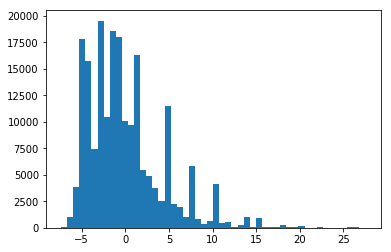

In [384]:
plt.hist(y_test-y_rf, bins=50)

In [408]:
regr2 = RandomForestRegressor(max_depth=5, random_state=137, n_estimators=2000)
regr2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=None,
           oob_score=False, random_state=137, verbose=0, warm_start=False)

In [409]:
fimpDict2 = {}
for fimp in list(zip(XX.columns, regr2.feature_importances_)):
    print(fimp)
    fimpDict2.update({fimp[0]:fimp[1]})

('distance', 0.08411159554577159)
('surge_multiplier', 0.004798135772894215)
('temp', 4.058997336139654e-08)
('clouds', 1.3079708087929082e-07)
('pressure', 2.559713669665222e-07)
('rain', 5.058205400501373e-08)
('humidity', 4.494692498683774e-07)
('wind', 8.703892792528805e-08)
('name_Black', 0.10285456211881895)
('name_Black SUV', 0.30573628116164037)
('name_Lux', 0.055831286838348856)
('name_Lux Black', 0.12507198862350913)
('name_Lux Black XL', 0.32110437716214707)
('name_Lyft', 0.0)
('name_Lyft XL', 0.0)
('name_Shared', 0.0)
('name_Taxi', 0.0)
('name_UberPool', 0.0)
('name_UberX', 0.0)
('name_UberXL', 0.0)
('name_WAV', 0.0)
('destination_Back Bay', 0.00014439988558463074)
('destination_Beacon Hill', 1.8422604099186783e-10)
('destination_Boston University', 1.0964727054163061e-09)
('destination_Fenway', 9.071226103555381e-07)
('destination_Financial District', 6.982415602747525e-06)
('destination_Haymarket Square', 4.232965322789462e-05)
('destination_North End', 1.6964724484275228

In [410]:
kk = list(fimpDict.keys())
vv = list(fimpDict.values())


fimpDF = pd.DataFrame({'features':kk,
                      'importance':vv})

In [411]:
fimpDF.sort_values(by='importance')

,features,importance
22,destination_Beacon Hill,0.000000
23,destination_Boston University,0.000000
24,destination_Fenway,0.000000
25,destination_Financial District,0.000000
27,destination_North End,0.000000
28,destination_North Station,0.000000
30,destination_South Station,0.000000
31,destination_Theatre District,0.000000
43,source_Theatre District,0.000000
32,destination_West End,0.000000


## haven't run yet

In [138]:
merged_df = pd.read_csv('merged_df.csv')

In [254]:
merged_df = merged_df[(merged_df.price < 40) & (merged_df.price >5)]

In [351]:
X = merged_df.drop(['price', 'location', 'merge_date',
                    'lprice', 'distance', 'cab_type_Lyft', 'destination_Back Bay',
                    'source_Back Bay', 'name_Taxi'], axis=1)
X = sm.add_constant(X)
X.reset_index(drop=True,inplace=True)
Y = pd.DataFrame(norm_Y.T)
Y.reset_index(drop=True,inplace=True)


In [219]:
y_array = np.array(merged_df['price'])
norm_y = preprocessing.normalize([y_array])
merged_df['nnprice'] = pd.DataFrame(norm_y.T)

In [168]:
d_array = np.array(merged_df['distance'])
norm_d = preprocessing.normalize([d_array])
merged_df['ndistance'] = pd.DataFrame(norm_d.T)

In [169]:
t_array = np.array(merged_df['temp'])
norm_t = preprocessing.normalize([t_array])
merged_df['ntemp'] = pd.DataFrame(norm_t.T)

In [170]:
c_array = np.array(merged_df['clouds'])
norm_c = preprocessing.normalize([c_array])
merged_df['nclouds'] = pd.DataFrame(norm_c.T)

In [171]:
p_array = np.array(merged_df['pressure'])
norm_p = preprocessing.normalize([p_array])
merged_df['npressure'] = pd.DataFrame(norm_p.T)

In [172]:
r_array = np.array(merged_df['rain'])
norm_r = preprocessing.normalize([r_array])
merged_df['nrain'] = pd.DataFrame(norm_r.T)

In [173]:
h_array = np.array(merged_df['humidity'])
norm_h = preprocessing.normalize([h_array])
merged_df['nhumidity'] = pd.DataFrame(norm_h.T)

In [174]:
w_array = np.array(merged_df['wind'])
norm_w = preprocessing.normalize([w_array])
merged_df['nwind'] = pd.DataFrame(norm_w.T)